<a href="https://colab.research.google.com/github/amalsu0/RestaurantsProject/blob/main/RestaurantsRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SimpliLearn project 

https://www.simplilearn.com/

Source Code:

KAUSHIK BANDYOPADHYAY

https://www.kaggle.com/kaushikbandyopadhyay/identifying-and-recommending-best-restaurants/notebook **bold text**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('data.xlsx')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [ ]:
code = pd.read_excel('Country-Code.xlsx')
code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
# left join
res_data = pd.merge(data,code,on='Country Code',how='left')
res_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [ ]:
# replace white spaces with _
res_data.columns = res_data.columns.str.replace(' ','_')

In [ ]:
# to see how many null values are there 
res_data.isnull().sum()

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

In [ ]:
res_data[res_data['Restaurant_Name'].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
1646,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769,India


In [ ]:
# drop the observation that has the Resturant name as null
res_data.dropna(axis=0,subset=['Restaurant_Name'],inplace=True)
res_data.reset_index(drop=True,inplace=True)

In [ ]:
res_data[res_data['Cuisines'].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
9082,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9085,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9093,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9405,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9493,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9503,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9532,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9534,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9538,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [ ]:
# replace the observations that has Cuisines as "null"  with "others"
res_data['Cuisines'].fillna('Others',inplace=True)

In [ ]:
res_data.isnull().sum()

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

**Performing EDA:**

1- Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants

In [ ]:
res_geo = res_data.groupby(['Country']).agg( Count = ('Restaurant_ID','count'))
res_geo.sort_values(by='Count',ascending=False)

,Count
Country,
India,8651
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


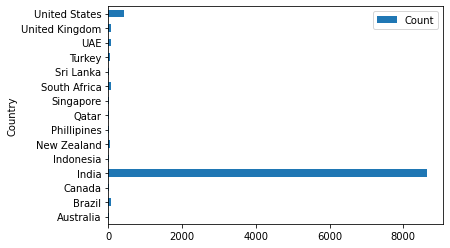

In [ ]:
res_geo.plot(kind='barh')

In [ ]:
res_cities = res_data.groupby(['Country','City']).agg(Count = ('Restaurant_ID','count'))
res_cities.sort_values(by='Count',ascending=False)

# MAXIMUM number of resturants is in New Delhi with 5473 resturants.

Count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

In [ ]:
# MINIMUN number of resturants is 1 , the cities that have only one resturant are 
res_min_cities = res_cities[res_cities['Count']==1]
res_min_cities

Count
Country       City                   
Australia     Armidale              1
              Balingup              1
              Beechworth            1
              Dicky Beach           1
              East Ballina          1
              Flaxton               1
              Forrest               1
              Huskisson             1
              Inverloch             1
              Lakes Entrance        1
              Lorn                  1
              Macedon               1
              Mayfield              1
              Middleton Beach       1
              Montville             1
              Palm Cove             1
              Paynesville           1
              Penola                1
              Phillip Island        1
              Tanunda               1
              Trentham East         1
              Victor Harbor         1
Canada        Chatham-Kent          1
              Consort               1
              Vineland Station      1
              Yorkton               1
India         Mohali                1
              Panchkula             1
Indonesia     Bandung               1
Phillipines   Quezon City           1
              Tagaytay City         1
South Africa  Randburg              1
United States Clatskanie            1
              Cochrane              1
              Fernley               1
              Lakeview              1
              Lincoln               1
              Mc Millan             1
              Miller                1
              Monroe                1
              Ojo Caliente          1
              Potrero               1
              Princeton             1
              Vernonia              1
              Weirton               1
              Winchester Bay        1

Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence

In [ ]:
# restaurants with highest rating
res_max_rate = res_data.sort_values(by='Aggregate_rating',ascending=False).groupby(['Country','City'],as_index=False).first()
max_df=res_max_rate[['Country','City','Restaurant_Name','Aggregate_rating']] 

# restaurants with lowest rating
res_min_rate = res_data.sort_values(by='Aggregate_rating',ascending=False).groupby(['Country','City'],as_index=False).last()
min_df=res_min_rate[['Country','City','Restaurant_Name','Aggregate_rating']] 

# join them in single data frame
res_rate =max_df.merge(min_df,left_on='City',right_on='City',how='inner')
res_rate.drop(columns='Country_y',axis=1,inplace=True)
res_rate.columns = ['Country','City','Highest Rated Restaurant','Rating Max','Lowest Rated Restaurant','Rating Min']
res_rate


,Country,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
0,Australia,Armidale,Whitebull Hotel,3.5,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,The Belle General,4.1
...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,Theo Yianni's Authentic Greek Restaurant,3.9


In [ ]:
res_data1 = res_data.copy()
dummy = ['Has_Table_booking','Has_Online_delivery']
res_data1 = pd.get_dummies(res_data1,columns=dummy,drop_first=True)

no of resturants allow table booking:  1158
no of resturants dont allow table booking:  8392
Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.14


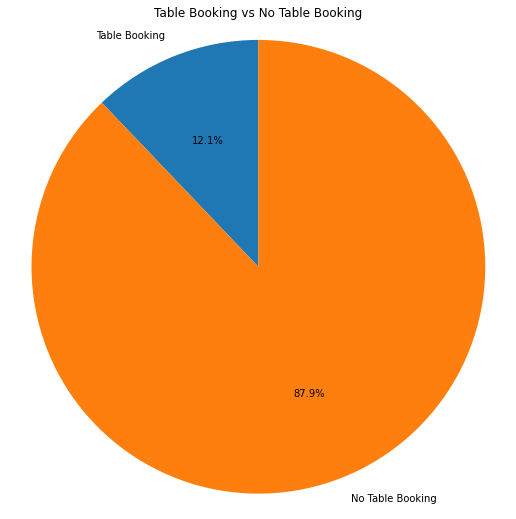

In [ ]:
#Ratio between restaurants allowing table booking and those which dont
table_booking = res_data1[res_data1['Has_Table_booking_Yes']==1]['Restaurant_ID'].count()
table_nbooking =res_data1[res_data1['Has_Table_booking_Yes']==0]['Restaurant_ID'].count()
print("no of resturants allow table booking: " , table_booking)
print("no of resturants dont allow table booking: " , table_nbooking)
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking: ',
      round((table_booking/table_nbooking),2))


#Pie chart to show percentage of restaurants which allow table booking and those which don't
labels = 'Table Booking', 'No Table Booking'
sizes = [table_booking,table_nbooking]
explode = (0, 0) 

fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.set_title("Table Booking vs No Table Booking")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Percentage of restaurants providing online delivery : 25.7 %


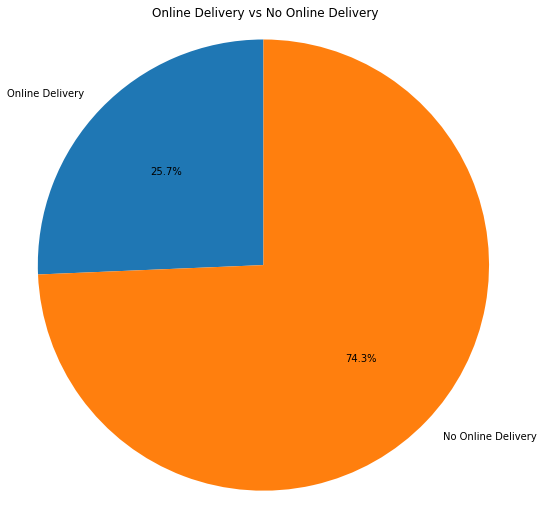

In [ ]:
#Percentage of restaurant that has online delivery
rest_od = res_data1[res_data1['Has_Online_delivery_Yes'] == 1]['Restaurant_ID'].count()
rest_nod = res_data1[res_data1['Has_Online_delivery_Yes'] == 0]['Restaurant_ID'].count()
print('Percentage of restaurants providing online delivery : {} %'.format((round(rest_od/len(res_data1),3)*100)))

#pie chart to show percentages of restaurants allowing online delivery vs those which do not have online delivery
lbls = 'Online Delivery','No Online Delivery'
size = [rest_od,rest_nod]
explode = (0,0)
fig1,ax1 = plt.subplots(figsize=(9,9))
ax1.pie(size,explode=explode,labels=lbls,autopct='%1.1f%%',shadow=False,startangle=90)
ax1.set_title("Online Delivery vs No Online Delivery")
ax1.axis('equal')
plt.show()

Difference in number of votes for restaurants that deliver and dont deliver:  680082


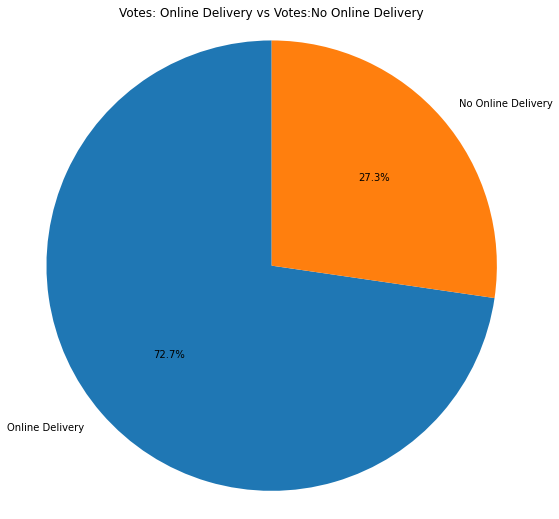

In [ ]:
rest_deliver = res_data1[res_data1['Has_Table_booking_Yes'] == 1]['Votes'].sum()
rest_ndeliver = res_data1[res_data1['Has_Table_booking_Yes'] == 0]['Votes'].sum()
print('Difference in number of votes for restaurants that deliver and dont deliver: ',abs((rest_deliver - rest_ndeliver)))
labels = 'Online Delivery','No Online Delivery'
size = [rest_ndeliver,rest_deliver]
explode = (0,0)
fig1,ax1 = plt.subplots(figsize=(9,9))
ax1.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)
ax1.set_title("Votes: Online Delivery vs Votes:No Online Delivery")
ax1.axis('equal')
plt.show()

What are the top 10 cuisines served across cities?

What is the maximum and minimum no. of cuisines that a restaurant serves?

In [ ]:
cuisines = res_data['Cuisines'].apply(lambda x: pd.Series(x.split(',')))
cuisines.columns = ['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
cuisines.tail()

df_cuisines = pd.concat([df_rest,cuisines],axis=1)
df_cuisines.head()

cuisine_loc = pd.DataFrame(df_cuisines[['Country','City','Locality_Verbose','Cuisine_1','Cuisine_2','Cuisine_3',
                                        'Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])
cuisine_loc_stack=pd.DataFrame(cuisine_loc.stack()) #stacking the columns 

keys = [c for c in cuisine_loc  if c.startswith('Cuisine')]
a=pd.melt(cuisine_loc, id_vars='Locality_Verbose', value_vars=keys, value_name='Cuisines') 
max_rate=pd.DataFrame(a.groupby(by=['Locality_Verbose','variable','Cuisines']).size().reset_index())
del max_rate['variable']
max_rate.columns=['Locality_Verbose','Cuisines','Count']

loc=max_rate.sort_values('Count', ascending=False).groupby(by=['Locality_Verbose'],as_index=False).first()

rating_res=loc.merge(res_data,left_on='Locality_Verbose',right_on='Locality_Verbose',how='inner') 
#inner join to merge the two dataframe

df=pd.DataFrame(rating_res[['Country','City','Locality_Verbose','Cuisines_x','Count']]) 
#making a dataframe of rating restaurant

country=rating_res.sort_values('Count', ascending=False).groupby(by=['Country'],as_index=False).first()
#grouping the data by country code
con=pd.DataFrame(country[['Country','City','Locality','Cuisines_x','Count']])
con.columns=['Country','City','Locality','Cuisines','Number of restaurants in the country']
#renaming the columns
con1=con.sort_values('Number of restaurants in the country', ascending=False) 
#sorting the restaurants on the basis of the number of restaurants in the country
con1[:10]
final_con=con1.drop(con1.index[[7,10]])

final_con

,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
9545,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9546,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9547,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9548,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9549,Chinese,North Indian,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loc_list=final_con['City'] #converting the series to dataframe
a_list=loc_list.tolist()

cui_list=final_con['Cuisines']# converting the series to dataframe
b_list=cui_list.tolist()

count_list=final_con['Number of restaurants in the country']# converting the series to dataframe
c_list=count_list.tolist()

In [ ]:
rest_cuisine = pd.DataFrame(df_cuisines[['Restaurant_Name','City','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4',
                                         'Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])
rest_cuisine_stack=pd.DataFrame(rest_cuisine.stack()) #stacking the columns 
rest_cuisine.head()

,Restaurant_Name,City,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Skye,Jakarta,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Jakarta,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Jakarta,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Jakarta,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
keys1 = [c for c in rest_cuisine  if c.startswith('Cuisine')]
b=pd.melt(rest_cuisine, id_vars='Restaurant_Name', value_vars=keys, value_name='Cuisines') 
#melting the stack into one row
max_rate1=pd.DataFrame(b.groupby(by=['Restaurant_Name','variable','Cuisines']).size().reset_index()) 
#find the highest restuarant in the city
max_rate1
del max_rate1['variable']
max_rate1.columns=['Restaurant_Name','Cuisines','Count']
max_rate1.head(20)

,Restaurant_Name,Cuisines,Count
0,12212,Fast Food,1
1,Let's Burrrp,Chinese,1
2,Let's Burrrp,North Indian,1
3,#45,Cafe,1
4,#Dilliwaala6,North Indian,1
5,#InstaFreeze,Ice Cream,1
6,#OFF Campus,Cafe,1
7,#OFF Campus,Continental,1
8,#OFF Campus,Italian,1
9,#OFF Campus,Fast Food,1


In [ ]:
max_rate1.sort_values('Count',ascending=False)
#Cafe Coffee Day has the max number of cuisines and The least number of cuisines in a resaurant is 1.

,Restaurant_Name,Cuisines,Count
2479,Cafe Coffee Day,Cafe,83
4596,Domino's Pizza,Pizza,79
4597,Domino's Pizza,Fast Food,78
12984,Subway,Salad,63
12985,Subway,Healthy Food,63
...,...,...,...
5568,Gabbar's Bar & Kitchen,Chinese,1
5569,Gabbar's Bar & Kitchen,Mexican,1
5570,Gabbar's Bar & Kitchen,Italian,1
5571,Gaga Manjero,World Cuisine,1


In [ ]:
rating = res_data1[['Restaurant_ID','Restaurant_Name','Country','City','Aggregate_rating','Average_Cost_for_two','Votes','Price_range','Has_Table_booking_Yes','Has_Online_delivery_Yes']]
rating = rating.merge(max_rate1,left_on='Restaurant_Name',right_on='Restaurant_Name',how='left')
rating

,Restaurant_ID,Restaurant_Name,Country,City,Aggregate_rating,Average_Cost_for_two,Votes,Price_range,Has_Table_booking_Yes,Has_Online_delivery_Yes,Cuisines,Count
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,Italian,1
1,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,Continental,1
2,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Asian,1
3,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Indonesian,1
4,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Western,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23810,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,Italian,1
23811,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,Beverages,1
23812,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,0,0,Street Food,1
23813,18246202,VNS Live Studio,India,Varanasi,3.5,0,109,1,0,0,Chinese,1


,Count,Aggregate_rating
Count,1.000000,-0.001642
Aggregate_rating,-0.001642,1.000000


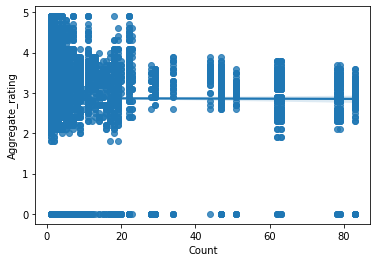

In [ ]:
sns.regplot(x='Count',y='Aggregate_rating',data=rating)
rating[["Count", "Aggregate_rating"]].corr()
#Number of cuisines is not a good factor to decide the rating of a restaurant

,Average_Cost_for_two,Aggregate_rating
Average_Cost_for_two,1.00000,0.05011
Aggregate_rating,0.05011,1.00000


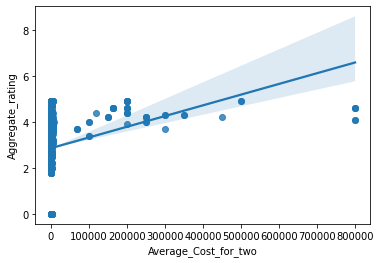

In [ ]:
sns.regplot(x='Average_Cost_for_two',y='Aggregate_rating',data=rating)
rating[["Average_Cost_for_two", "Aggregate_rating"]].corr()
#Average cost for two is a weak positive factor to decide the rating of a restaurant

,Votes,Aggregate_rating
Votes,1.000000,0.318667
Aggregate_rating,0.318667,1.000000


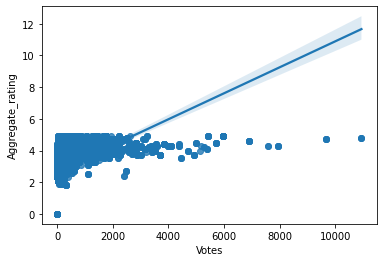

In [ ]:
sns.regplot(x='Votes',y='Aggregate_rating',data=rating)
rating[['Votes','Aggregate_rating']].corr()
##votes  can be a factor to decide the rating of a restaurant

,Price_range,Aggregate_rating
Price_range,1.000000,0.462983
Aggregate_rating,0.462983,1.000000


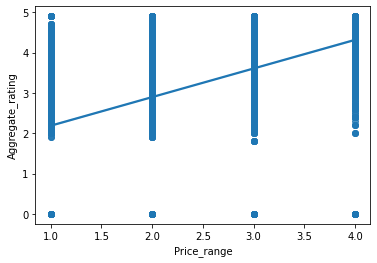

In [ ]:
abc = res_data1[res_data1['Has_Online_delivery_Yes'] == 1]['Aggregate_rating'].mean()
xyz = res_data1[res_data1['Has_Online_delivery_Yes'] == 0]['Aggregate_rating'].mean()
sns.regplot(x='Price_range',y='Aggregate_rating',data=rating)
rating[['Price_range','Aggregate_rating']].corr()
##Price range can be a factor to decide the rating of a restaurant

,Has_Table_booking_Yes,Aggregate_rating
Has_Table_booking_Yes,1.000000,0.181843
Aggregate_rating,0.181843,1.000000


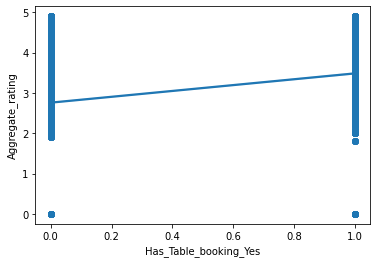

In [ ]:
sns.regplot(x='Has_Table_booking_Yes',y='Aggregate_rating',data=rating)
rating[['Has_Table_booking_Yes','Aggregate_rating']].corr()
##Table booking can be a factor to decide the rating of a restaurant